In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\Sean\\Desktop\excel_data')

In [3]:
ngram_vader_df = pd.read_csv('ngram_score_vader.csv')
ngram_rating_df = pd.read_csv("ngram_score_rating.csv")

In [4]:
ngram_vader_df  = ngram_vader_df.drop(['Unnamed: 0'],axis=1)
ngram_rating_df = ngram_rating_df.drop(['Unnamed: 0'],axis=1)
ngram_vader_df

,n_gram,score
0,"(1, 1)",0.894478
1,"(1, 2)",0.939633
2,"(1, 3)",0.943178


In [5]:
new_df = pd.DataFrame({"n_gram":ngram_vader_df.n_gram, "vader_score":ngram_vader_df.score, "rating_score":ngram_rating_df.score})
new_df

,n_gram,vader_score,rating_score
0,"(1, 1)",0.894478,0.795244
1,"(1, 2)",0.939633,0.895689
2,"(1, 3)",0.943178,0.910700


In [6]:
new_df.vader_score = new_df.vader_score * 100
new_df.rating_score = new_df.rating_score * 100
new_df

,n_gram,vader_score,rating_score
0,"(1, 1)",89.447778,79.524444
1,"(1, 2)",93.963333,89.568889
2,"(1, 3)",94.317778,91.070000


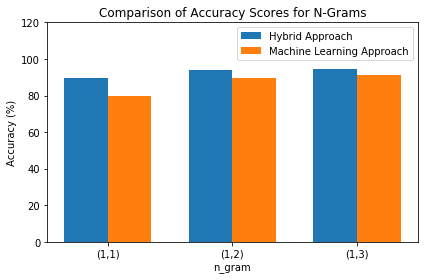

In [7]:
df = new_df

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
summer = ax.bar(index, df["vader_score"], bar_width, label="Hybrid Approach")

winter = ax.bar(index+bar_width, df["rating_score"], bar_width, label="Machine Learning Approach")

ax.set_xlabel('n_gram')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Accuracy Scores for N-Grams')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(0, 140, step=20))
ax.set_xticklabels(["(1,1)", "(1,2)", "(1,3)"])
ax.legend()

#plt.show()
plt.tight_layout()
plt.savefig('comparison_ngram_accuracy.png')

In [8]:
vader_df = pd.read_csv("classication_report_svm_vader.csv")
rating_df = pd.read_csv("classication_report_svm_rating.csv")
print(vader_df)
print(rating_df)

     Unnamed: 0  precision    recall  f1-score       support
0             0   0.891135  0.854855  0.872618  21296.000000
1             1   0.821381  0.864704  0.842486  16438.000000
2      accuracy   0.859146  0.859146  0.859146      0.859146
3     macro avg   0.856258  0.859780  0.857552  37734.000000
4  weighted avg   0.860748  0.859146  0.859492  37734.000000
     Unnamed: 0  precision    recall  f1-score       support
0             0   0.752799  0.715481  0.733666  15412.000000
1             1   0.810058  0.837783  0.823687  22322.000000
2      accuracy   0.787831  0.787831  0.787831      0.787831
3     macro avg   0.781429  0.776632  0.778677  37734.000000
4  weighted avg   0.786671  0.787831  0.786919  37734.000000


In [9]:
#PRECISION
precision_df = pd.DataFrame({"VADER score":[vader_df.precision[0]*100, vader_df.precision[1]*100], 
                             "Rating score":[rating_df.precision[0]*100, rating_df.precision[1]*100]})
index = ["negative", "positive"]
precision_df.index = index
precision_df

,VADER score,Rating score
negative,89.113515,75.279902
positive,82.138110,81.005804


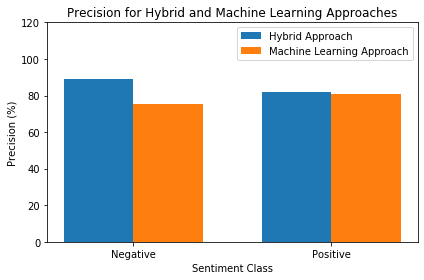

In [10]:
#PRECISION
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots()
vader = ax.bar(index, precision_df["VADER score"], bar_width, label="Hybrid Approach")

rating = ax.bar(index+bar_width, precision_df["Rating score"], bar_width, label="Machine Learning Approach")

ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Precision (%)')
ax.set_title('Precision for Hybrid and Machine Learning Approaches')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(0, 140, step=20))
ax.set_xticklabels(["Negative", "Positive"])
ax.legend()

#plt.show()
plt.tight_layout()
plt.savefig('Precision of VADER vs Rating.png')

In [11]:
#RECALL
recall_df = pd.DataFrame({"VADER score":[vader_df.recall[0]*100, vader_df.recall[1]*100], 
                          "Rating score":[rating_df.recall[0]*100, rating_df.recall[1]*100]})
index = ["negative", "positive"]
recall_df.index = index
recall_df

,VADER score,Rating score
negative,85.485537,71.548144
positive,86.470374,83.778335


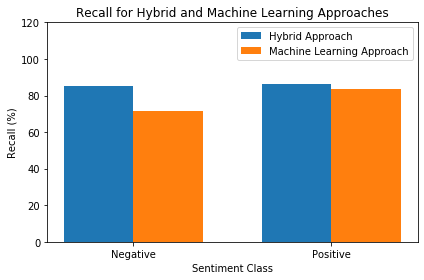

In [12]:
#RECALL
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots()
vader = ax.bar(index, recall_df["VADER score"], bar_width, label="Hybrid Approach")

rating = ax.bar(index+bar_width, recall_df["Rating score"], bar_width, label="Machine Learning Approach")

ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Recall (%)')
ax.set_title('Recall for Hybrid and Machine Learning Approaches')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(0, 140, step=20))
ax.set_xticklabels(["Negative", "Positive"])
ax.legend()

#plt.show()
plt.tight_layout()
plt.savefig('Recall of VADER vs Rating.png')

In [13]:
#FSCORE
fscore_df = pd.DataFrame({"VADER score":[vader_df["f1-score"][0]*100, vader_df["f1-score"][1]*100], 
                          "Rating score":[rating_df["f1-score"][0]*100, rating_df["f1-score"][1]*100]})
index = ["negative", "positive"]
fscore_df.index = index
fscore_df

,VADER score,Rating score
negative,87.261833,73.366600
positive,84.248585,82.368746


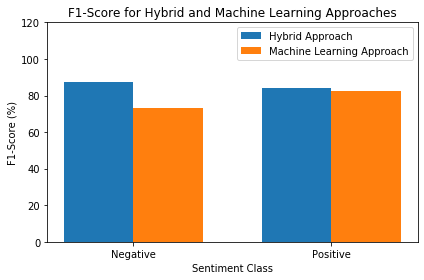

In [14]:
#FSCORE
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots()
vader = ax.bar(index, fscore_df["VADER score"], bar_width, label="Hybrid Approach")

rating = ax.bar(index+bar_width, fscore_df["Rating score"], bar_width, label="Machine Learning Approach")

ax.set_xlabel('Sentiment Class')
ax.set_ylabel('F1-Score (%)')
ax.set_title('F1-Score for Hybrid and Machine Learning Approaches')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(0, 140, step=20))
ax.set_xticklabels(["Negative", "Positive"])
ax.legend()

#plt.show()
plt.tight_layout()
plt.savefig('F1-Score of VADER vs Rating.png')

In [15]:
#ACCURACY
accuracy_df = pd.DataFrame({"VADER score":[vader_df["precision"][2]*100], 
                           "Rating score":[rating_df["precision"][2]*100]})

accuracy_df

,VADER score,Rating score
0,85.91456,78.78306


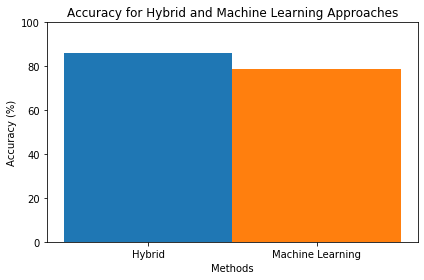

In [16]:
#ACCURACY
index = np.arange(1)
bar_width = 0.35

fig, ax = plt.subplots()
vader = ax.bar(index, accuracy_df["VADER score"], bar_width)

rating = ax.bar(index+bar_width, accuracy_df["Rating score"], bar_width)

ax.set_xlabel('Methods')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy for Hybrid and Machine Learning Approaches')
ax.set_xticks([0, 0.35])
ax.set_yticks(np.arange(0, 120, step=20))
ax.set_xticklabels(["Hybrid", "Machine Learning"])

#plt.show()
plt.tight_layout()
plt.savefig('Accuracy of VADER vs Rating.png')